In [112]:
import os
import csv
import random
import math
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

from skimage import io
from skimage import color
from skimage import feature
from skimage import transform
from skimage import data

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

%matplotlib inline

In [113]:
W = 100
H = 100

In [114]:
"""
im_list = []
im_list.append(data.chelsea())
im_list.append(data.astronaut())
im_list.append(data.checkerboard())

SAMPLE_DIR = "./images"
for fname in os.listdir(SAMPLE_DIR):
    im_list.append(io.imread(SAMPLE_DIR + '/' + fname))
    
truth = []
for im in im_list:
    tr = transform.resize(im, (W,H))
    tr = color.rgb2gray(tr)
    tr = feature.canny(tr, sigma = 1)
    truth.append(tr)

plt.imshow(truth[9])    
"""

'\nim_list = []\nim_list.append(data.chelsea())\nim_list.append(data.astronaut())\nim_list.append(data.checkerboard())\n\nSAMPLE_DIR = "./images"\nfor fname in os.listdir(SAMPLE_DIR):\n    im_list.append(io.imread(SAMPLE_DIR + \'/\' + fname))\n    \ntruth = []\nfor im in im_list:\n    tr = transform.resize(im, (W,H))\n    tr = color.rgb2gray(tr)\n    tr = feature.canny(tr, sigma = 1)\n    truth.append(tr)\n\nplt.imshow(truth[9])    \n'

In [115]:
IM_DIR = "./lane_images"
N = 60
im_list = []
truth_list = []
for i in range(N):
    im = io.imread("{}/camera{}.png".format(IM_DIR, i))
    im = transform.resize(im, (H, W))
    
    lanes = io.imread("{}/lane{}.png".format(IM_DIR, i))
    lanes = transform.resize(lanes, (H, W))
    lanes[lanes != 0] = 255
    
    im_list.append(im)
    truth_list.append(lanes)

    

/Users/tempflip/miniconda3/envs/d/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


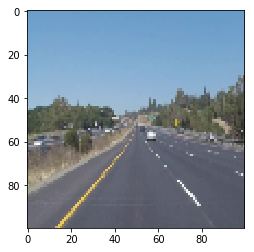

In [116]:
plt.imshow(im_list[5])

In [117]:
# generating more training data
#########
# flip - axis 0
for i in range(len(im_list)):
    im_list.append(np.flip(im_list[i], axis = 0))
    truth_list.append(np.flip(truth_list[i], axis = 0))

# flip - axis 1
for i in range(len(im_list)):
    im_list.append(np.flip(im_list[i], axis = 1))
    truth_list.append(np.flip(truth_list[i], axis = 1))

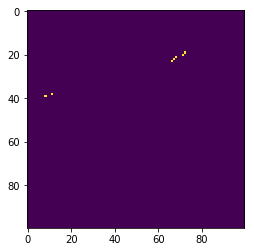

In [118]:
plt.imshow(truth_list[69])

In [119]:
#x_train = [color.rgb2gray(transform.resize(im, (W,H))) for im in im_list]
x_train = np.array(im_list)
y_train = np.array(truth_list)

#x_train = np.array(x_train).reshape((-1, W, H, 1))
y_train = np.array(y_train).reshape((-1, W * H))

print(x_train.shape, y_train.shape)

(240, 100, 100, 3) (240, 10000)


In [120]:
B = 5
model = Sequential()
model.add(Convolution2D(5, B, B, input_shape = (W, H, 3)))
print (model.output)
model.add(Flatten())
print (model.output)
model.add(Dense(100))
model.add(Dense(10000))
model.add(Activation('relu'))
#model.add(Dense(10000))
print (model.output)


Tensor("add_69:0", shape=(?, 96, 96, 5), dtype=float32)
Tensor("Reshape_9:0", shape=(?, ?), dtype=float32)
Tensor("Relu_4:0", shape=(?, 10000), dtype=float32)


In [121]:
model.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

In [122]:
E = 50
history = model.fit(x_train, y_train, nb_epoch=E)

Epoch 1/50
240/240 [==============================] - 1s - loss: 231.9577 - acc: 0.0000e+00     
Epoch 2/50
240/240 [==============================] - 1s - loss: 226.9429 - acc: 0.0000e+00     
Epoch 3/50
240/240 [==============================] - 1s - loss: 221.5393 - acc: 0.0000e+00     
Epoch 4/50
240/240 [==============================] - 1s - loss: 218.2409 - acc: 0.0000e+00     
Epoch 5/50
240/240 [==============================] - 1s - loss: 213.8148 - acc: 0.0000e+00     
Epoch 6/50
240/240 [==============================] - 1s - loss: 207.2122 - acc: 0.0000e+00     
Epoch 7/50
240/240 [==============================] - 1s - loss: 198.9033 - acc: 0.0000e+00     
Epoch 8/50
240/240 [==============================] - 1s - loss: 193.2876 - acc: 0.0000e+00     
Epoch 9/50
240/240 [==============================] - 1s - loss: 189.9525 - acc: 0.0000e+00     
Epoch 10/50
240/240 [==============================] - 1s - loss: 188.4866 - acc: 0.0000e+00     
Epoch 11/50
240/240 [========

In [123]:
pred = model.predict(x_train)

In [124]:
pred_images = np.array(pred).reshape((-1, W, H)).astype(int)


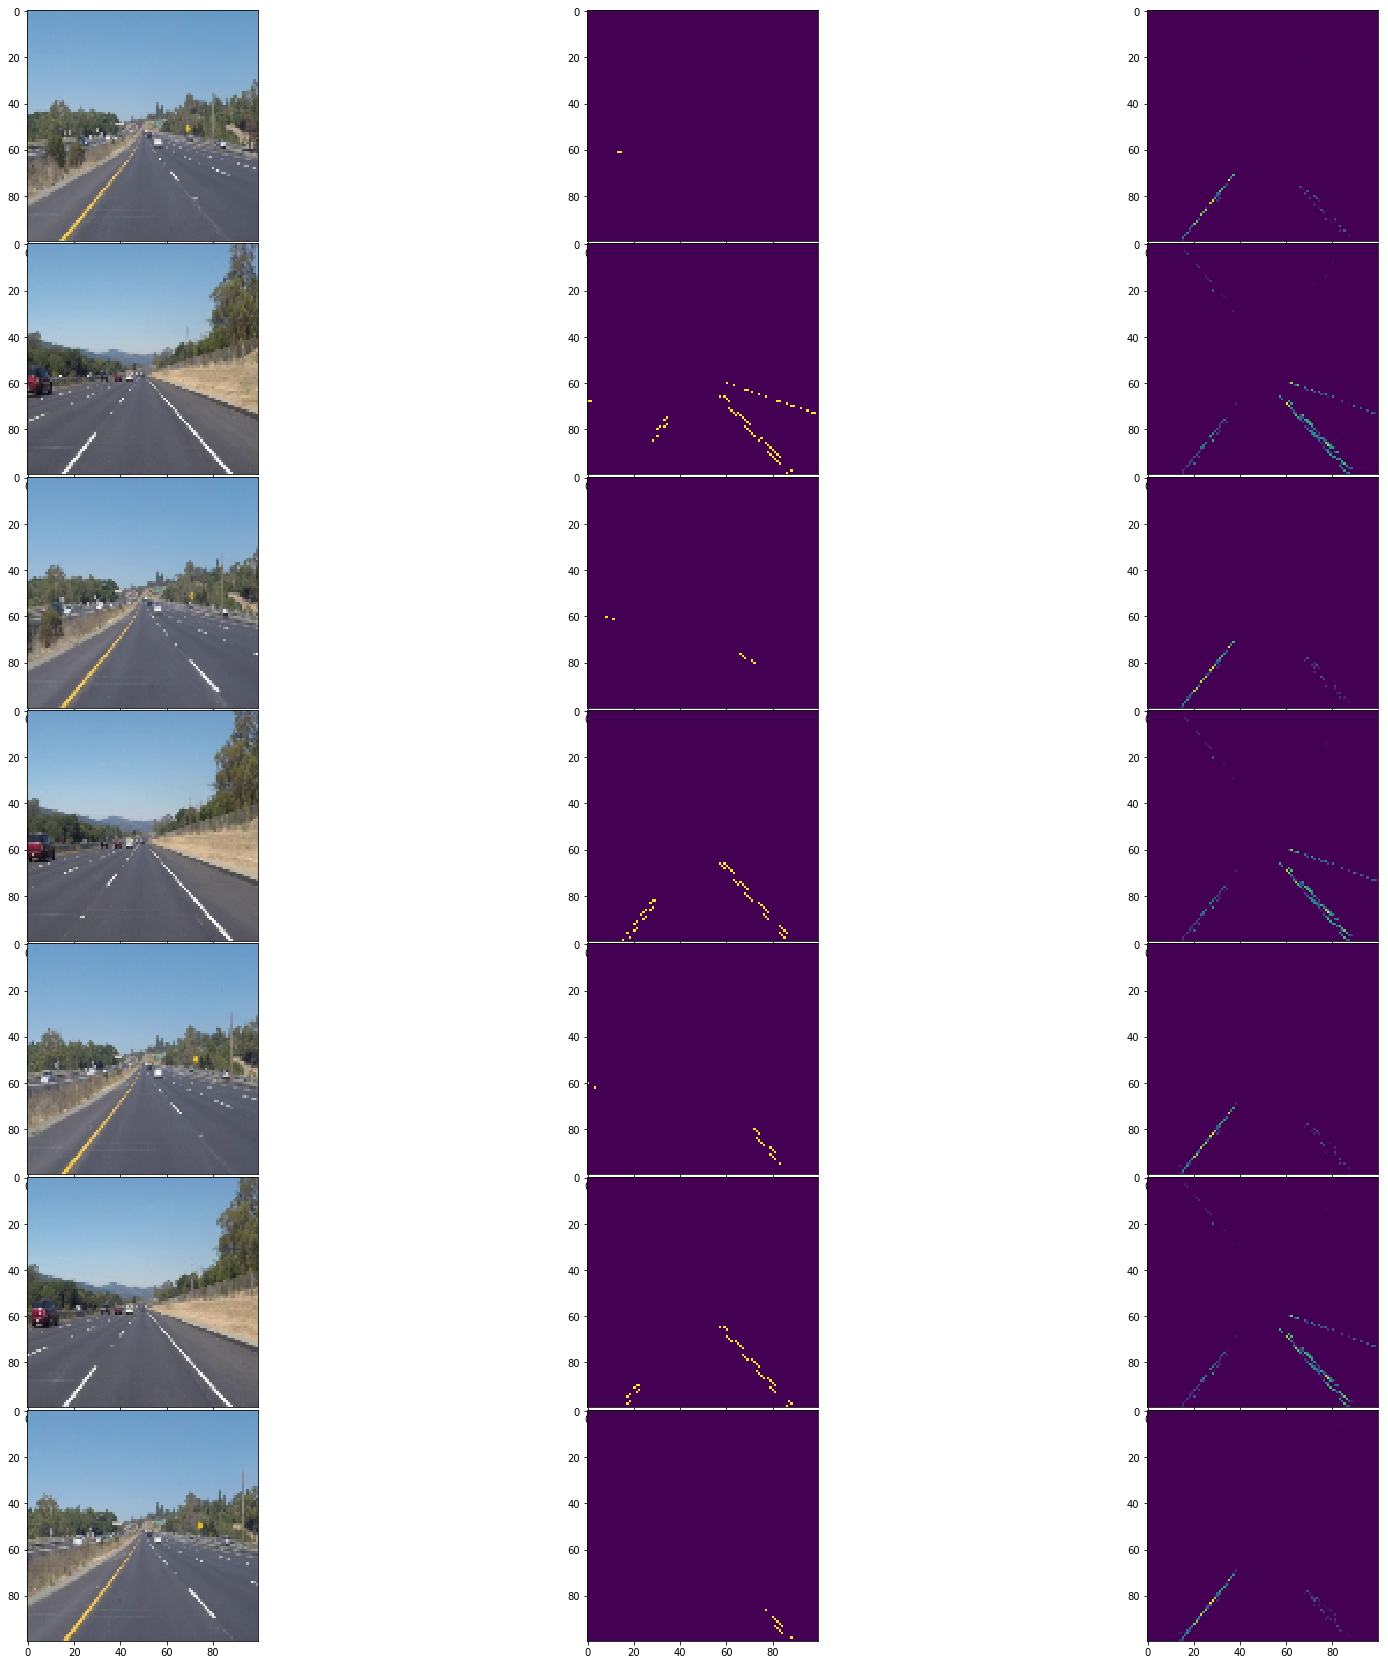

In [126]:
plt.figure(figsize=(30,30))
plt.subplots_adjust(hspace = 0.01)
plt.subplots_adjust(wspace = 0.01)

for i in range(n):
    ii = i + 7
    
    plt.subplot(n, 3, 3 * i + 1)
    plt.imshow(x_train[ii])
    plt.subplot(n, 3, 3 * i + 2)
    plt.imshow(truth_list[ii])
    plt.subplot(n, 3, 3 * i + 3)
    plt.imshow(pred_images[ii])
